In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('dataset.csv')
df.dropna(inplace=True)
df

,month,Temp. ave.,Humidity ave.,product_1,product_2,product_total,Usage_power_1,Usage_power_2,Usage_power_total,Usage_LNG_1,Usage_LNG_2,Usage_LNG_total
0,2017-01-01,-1.7,56,458.0,197.0,655.0,131076.0,208894.0,339970.0,30701.0,40601.0,71302.0
1,2017-02-01,0.1,52,345.0,180.0,525.0,126691.0,165730.0,292421.0,2.0,60063.0,60065.0
2,2017-03-01,5.3,51,451.0,236.0,687.0,108115.0,153727.0,261842.0,0.0,74865.0,74865.0
3,2017-04-01,13.3,50,408.0,220.0,628.0,134957.0,215309.0,350266.0,0.0,68629.0,68629.0
4,2017-05-01,18.3,53,474.0,224.0,698.0,122889.0,236801.0,359690.0,850.0,66621.0,67471.0
5,2017-06-01,21.2,59,458.0,196.0,654.0,139723.0,259740.0,399463.0,3788.0,60659.0,64447.0
7,2017-08-01,23.8,78,426.0,214.0,640.0,159553.0,237327.0,396880.0,0.0,63114.0,63114.0
8,2017-09-01,18.4,74,492.0,197.0,689.0,164397.0,258803.0,423200.0,0.0,71470.0,71470.0
9,2017-10-01,13.7,74,366.0,171.0,537.0,136707.0,218239.0,354946.0,0.0,60119.0,60119.0
10,2017-11-01,4.6,59,437.0,196.0,633.0,125740.0,207692.0,333432.0,7.0,60930.0,60937.0


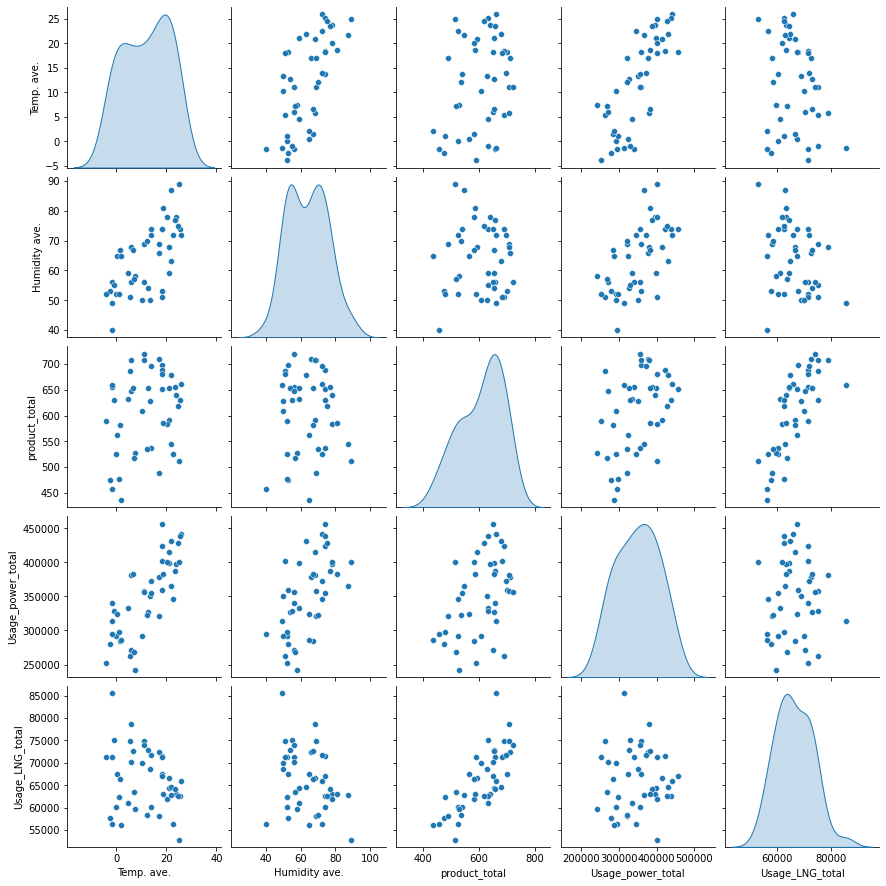

In [3]:
sns.pairplot(df[ ['Temp. ave.', 'Humidity ave.', 'product_total', 'Usage_power_total', 'Usage_LNG_total'] ], diag_kind="kde")

In [4]:
# X: feature, y: label

X = df[ ['Temp. ave.', 'Humidity ave.', 'product_1', 'product_2', 'product_total'] ]
y = df[ ['Usage_power_1', 'Usage_power_2', 'Usage_power_total', 'Usage_LNG_1', 'Usage_LNG_2', 'Usage_LNG_total'] ]
y = df[ ['Usage_power_total'] ]

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Linear Regression #

In [6]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [7]:
pred = model.predict(X_test)

In [8]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)
mean_squared_error(y_pred, y_test, squared = False)

36070.025086289126

# SVM

In [9]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X_train, y_train)

/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearSVR(epsilon=1.5)

In [10]:
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_poly_reg.fit(X_train, y_train)
y_pred = model.predict(X_test)

/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: x and y must be the same size

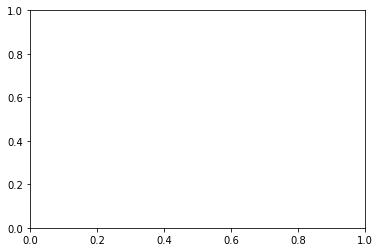

In [11]:
import matplotlib.pyplot as plt

plt.scatter(X_train, y_train, marker="+")
plt.scatter(X_test, y_pred, marker="o")
plt.show()